## Load Package

In [405]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation

## Load Dataset

In [322]:
train = pd.read_csv("train.csv", index_col="PassengerId")
test = pd.read_csv("test.csv", index_col = "PassengerId")

In [323]:
print(train.shape)
print(test.shape)
print("train has {} data | test has {} data".format(train.shape[0], test.shape[0]))

(891, 11)
(418, 10)
train has 891 data | test has 418 data


In [324]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [412]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Family_size
PassengerId,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0.0,1.0,0.0,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,0.0,0.0,1.0,1
894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0.0,1.0,0.0,0
895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0.0,0.0,1.0,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,0.0,0.0,1.0,2


# Explore Data

In [326]:
print("train has {} columns".format(len(train.columns)))
print("test has {} columns".format(len(test.columns)))
print("Target data is Survived")


train has 11 columns
test has 10 columns
Target data is Survived


### Unique data

In [327]:
# check unique data in train
for i in train.columns:
    print("{} has {} unique data".format(i, len(train[i].unique())))

Survived has 2 unique data
Pclass has 3 unique data
Name has 891 unique data
Sex has 2 unique data
Age has 89 unique data
SibSp has 7 unique data
Parch has 7 unique data
Ticket has 681 unique data
Fare has 248 unique data
Cabin has 148 unique data
Embarked has 4 unique data


In [328]:
# check unique data in test
for i in test.columns:
    print("{} has {} unique data".format(i, len(test[i].unique())))

Pclass has 3 unique data
Name has 418 unique data
Sex has 2 unique data
Age has 80 unique data
SibSp has 7 unique data
Parch has 8 unique data
Ticket has 363 unique data
Fare has 170 unique data
Cabin has 77 unique data
Embarked has 3 unique data


### Missing data

In [329]:
#check missing data in train
for i in train.columns:
    print("{0} has {1:.2f}% missing data".format(i, (len(train[train[i].isnull()]) / train.shape[0]) *100)) 

Survived has 0.00% missing data
Pclass has 0.00% missing data
Name has 0.00% missing data
Sex has 0.00% missing data
Age has 19.87% missing data
SibSp has 0.00% missing data
Parch has 0.00% missing data
Ticket has 0.00% missing data
Fare has 0.00% missing data
Cabin has 77.10% missing data
Embarked has 0.22% missing data


In [330]:
#check missing data in train
for i in test.columns:
    print("{0} has {1:.2f}% missing data".format(i, (len(test[test[i].isnull()]) / test.shape[0]) *100)) 

Pclass has 0.00% missing data
Name has 0.00% missing data
Sex has 0.00% missing data
Age has 20.57% missing data
SibSp has 0.00% missing data
Parch has 0.00% missing data
Ticket has 0.00% missing data
Fare has 0.24% missing data
Cabin has 78.23% missing data
Embarked has 0.00% missing data


### Define Data type

In [331]:
cat_data = ["Pclass","Sex","Ticket","Cabin","Emabarked"]
num_data = ["Age","Fare","SibSp","Parch"]
cat_1 = [14,15,16,17,18,24,25,26,27,30,31,32,33,34,35,36,37]

### Address Missig Data

#### Age

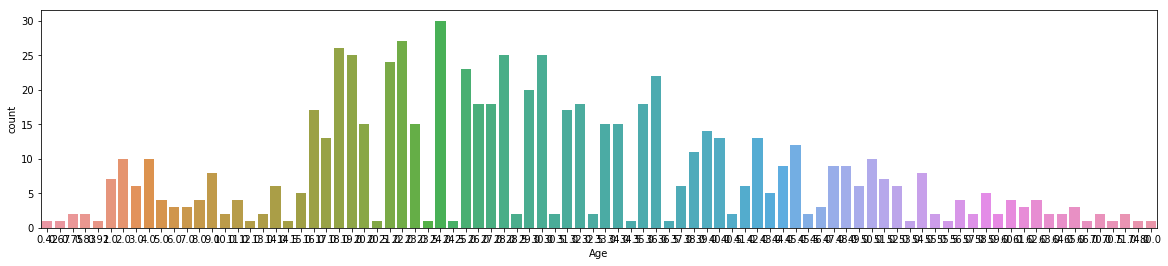

In [332]:
figure, axe = plt.subplots(nrows =1,ncols =1)
figure.set_size_inches(20,4)
sns.countplot(train["Age"])

In [333]:
#replace NoN data with Mode data
train.loc[train["Age"].isnull(),"Age"] = train["Age"].mode()[0]

In [334]:
test.loc[test["Age"].isnull(),"Age"] = test["Age"].mode()[0]

In [335]:
train.loc[train["Age"].isnull(),"Age"]

Series([], Name: Age, dtype: float64)

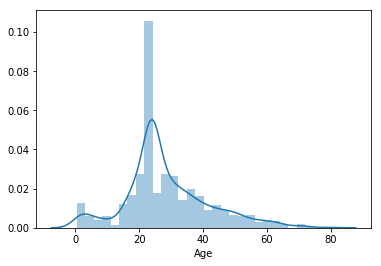

In [336]:
#Check deviation of Age
sns.distplot(train["Age"])

This distribution chart does not follow standard distribution(usually age data follows standard distribution)

So It could be non-useful feature 

hypothesis: NoN data belong to range from 10 to 30

In [337]:
train["Age"].describe()

count    891.000000
mean      28.566970
std       13.199572
min        0.420000
25%       22.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

#### Cabin

In [338]:
#Too many missing data, it means Cabin data would not be good feature to predict Target label
len(train[train["Cabin"].isnull()])

687

#### Embarked 

In [339]:
# replace NaN data with mdoe data
train.loc[train["Embarked"].isnull(),"Embarked"]  = train["Embarked"].mode()[0]

#### Fare Data

In [340]:
#replace NaN data with mean 
test.loc[test["Fare"].isnull(),"Fare"] = test["Fare"].mean()

## Preprocessing

### Encode Embarked

In [341]:
range(1,-1)

range(1, -1)

In [342]:
#train
le= LabelEncoder()
le.fit(train["Embarked"])
Embarked = le.transform(train["Embarked"])
# One hot encoding
Embarked= np.eye(3)[Embarked]
Embarked = pd.DataFrame(Embarked,columns =["Embarked_C","Embarked_Q","Embarked_S"])

In [343]:
train.reset_index(inplace=True)

In [344]:
train = pd.concat([train,Embarked], axis =1)
train.set_index("PassengerId",inplace=True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0,0.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,0.0,1.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,1.0


In [345]:
#test
le= LabelEncoder()
le.fit(test["Embarked"])
Embarked = le.transform(test["Embarked"])
# One hot encoding
Embarked= np.eye(3)[Embarked]
Embarked = pd.DataFrame(Embarked,columns =["Embarked_C","Embarked_Q","Embarked_S"])

In [413]:
test.reset_index(inplace=True)
test = pd.concat([test,Embarked], axis =1)
test.set_index("PassengerId",inplace=True)

### Encode Sex

In [349]:
#Encoding sex data in train
le.fit(train["Sex"])
sex = le.transform(train["Sex"])
train["Sex"] = sex.reshape(-1,1)

In [350]:
#Encoding sex data in test
le.fit(test["Sex"])
sex = le.transform(test["Sex"])
test["Sex"] = sex.reshape(-1,1)

# Explore corrleation between each feature and tarket label

In [353]:
train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.543351,-0.052872,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,0.131900,-0.356187,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053
Sex,-0.543351,0.131900,1.000000,0.073377,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.119224
Age,-0.052872,-0.356187,0.073377,1.000000,-0.232411,-0.155118,0.107554,0.025811,-0.071806,0.022577
SibSp,-0.035322,0.083081,-0.114631,-0.232411,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734
Parch,0.081629,0.018443,-0.245489,-0.155118,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814
Fare,0.257307,-0.549500,-0.182333,0.107554,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184
Embarked_C,0.168240,-0.243292,-0.082853,0.025811,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742
Embarked_Q,0.003650,0.221009,-0.074115,-0.071806,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421
Embarked_S,-0.149683,0.074053,0.119224,0.022577,0.068734,0.060814,-0.162184,-0.782742,-0.499421,1.000000


#### -High Corrleation with Survied : Sex, Pclass 

### Dive into two feature

### sex

In [354]:
# 1 : male, 0: femle
sex_corr = train[["Sex","Survived"]]

In [355]:
grouped = sex_corr.groupby("Sex")["Survived"].aggregate({"sum_of_survior":"sum"})

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [356]:
grouped["count_of_sex"] = sex_corr.groupby("Sex")["Survived"].aggregate({"count_of_sex":"count"})

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [357]:
grouped["s_rate"] = grouped["sum_of_survior"] / grouped["count_of_sex"]

In [358]:
grouped

,sum_of_survior,count_of_sex,s_rate
Sex,,,
0,233,314,0.742038
1,109,577,0.188908


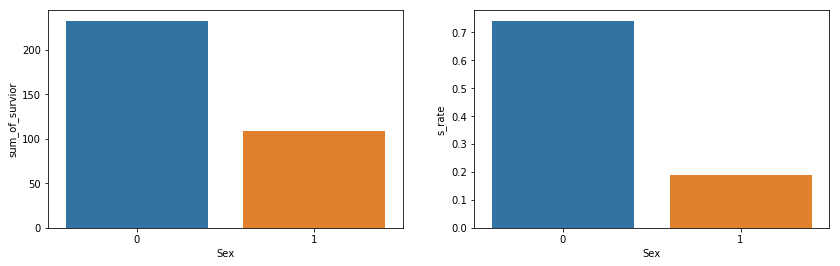

In [359]:
figure, (axe1,axe2) = plt.subplots(nrows = 1, ncols =2)
figure.set_size_inches(14,4)
sns.barplot(grouped.index,grouped["sum_of_survior"],ax = axe1)
sns.barplot(grouped.index,grouped["s_rate"],ax = axe2)


###  ********Graphs show that Plcass is key feature of this data*

### Pclass

In [360]:
pclass = train[["Pclass","Survived"]]

In [361]:
grouped = pclass.groupby("Pclass")["Survived"].aggregate({"sum_of_survivor":"sum"})

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [362]:
grouped["count_of_class"] = pclass.groupby("Pclass")["Survived"].aggregate({"count_of_class":"count"})

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [363]:
grouped["s_rate"] = grouped["sum_of_survivor"] / grouped["count_of_class"]

In [364]:
grouped

,sum_of_survivor,count_of_class,s_rate
Pclass,,,
1,136,216,0.629630
2,87,184,0.472826
3,119,491,0.242363


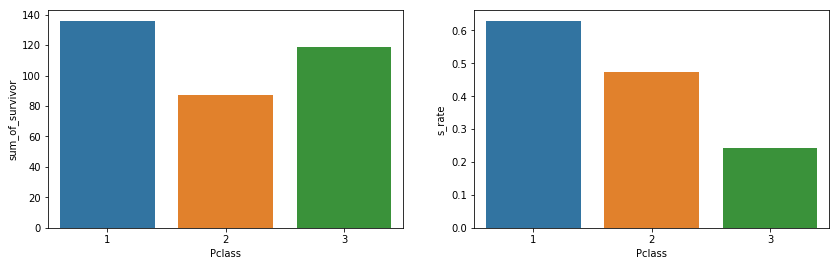

In [365]:
figure, (axe1,axe2) = plt.subplots(nrows = 1, ncols =2)
figure.set_size_inches(14,4)
sns.barplot(grouped.index,grouped["sum_of_survivor"],ax = axe1)
sns.barplot(grouped.index,grouped["s_rate"],ax = axe2)

#### high pclass customer must pay high fare that means Fare data would be same with Plcass pattern
###  ********Graphs show that Plcass is key feature of this data*

### Age

In [366]:
age = train.groupby("Age")["Survived"].aggregate({"sum_of_survivor":"sum"})

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [367]:
age["count_of_age"] = train.groupby("Age").size().values

In [368]:
age["s_rate"] = age["sum_of_survivor"] / age["count_of_age"]

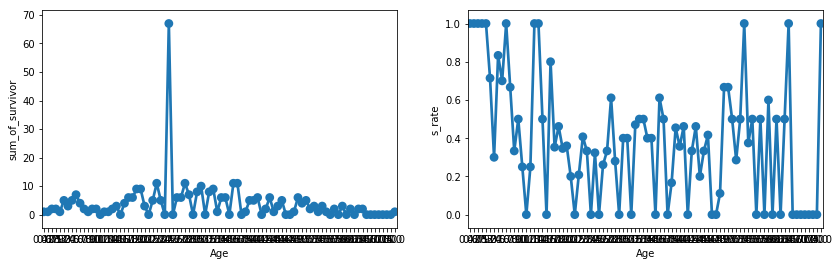

In [369]:
figure, (axe1,axe2) = plt.subplots(nrows = 1, ncols =2)
figure.set_size_inches(14,4)
sns.pointplot(age.index,age["sum_of_survivor"],ax = axe1)
sns.pointplot(age.index,age["s_rate"],ax = axe2)

In [370]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0,0.0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0.0,0.0,1.0
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,1.0


### Sibsp

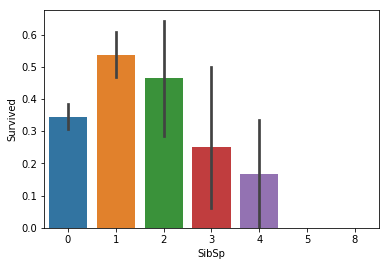

In [371]:
sns.barplot(train["SibSp"],train["Survived"])

#### when size is big, survived decreaes

### Parch

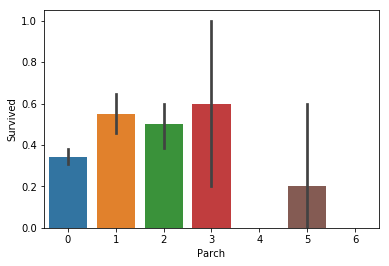

In [372]:
sns.barplot(train["Parch"],train["Survived"])

### Embarked

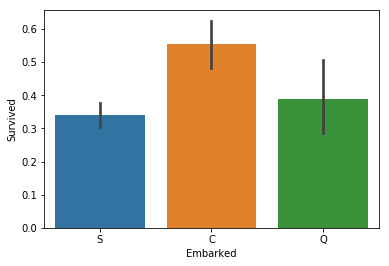

In [373]:
sns.barplot(train["Embarked"],train["Survived"])

# Feature engineering

### hypothesis : Large family is hard to survive because hard to find family and move

In [374]:
train["Family_size"] = train["Parch"] + train["SibSp"]
test["Family_size"] = test["Parch"] + test["SibSp"]

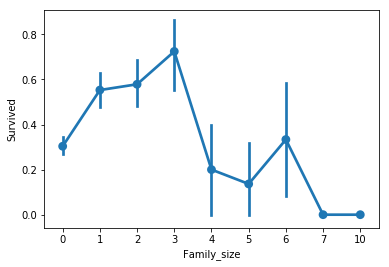

In [375]:
sns.pointplot(train["Family_size"],train["Survived"])

### Hypothesis makes sense

# Train

In [376]:
feature_names = ["Pclass", "Sex", "Fare","Family_size",
                 "Embarked_C", "Embarked_S", "Embarked_Q"]
feature_names

['Pclass',
 'Sex',
 'Fare',
 'Family_size',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q']

In [378]:
x_train = train[feature_names]

print(x_train.shape)
x_train.head()

(891, 7)


,Pclass,Sex,Fare,Family_size,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,
1,3,1,7.2500,1,0.0,1.0,0.0
2,1,0,71.2833,1,1.0,0.0,0.0
3,3,0,7.9250,0,0.0,1.0,0.0
4,1,0,53.1000,1,0.0,1.0,0.0
5,3,1,8.0500,0,0.0,1.0,0.0


In [379]:
x_test = test[feature_names]

print(x_test.shape)
x_test.head()

(418, 7)


,Pclass,Sex,Fare,Family_size,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,
892,3,1,7.8292,0,0.0,0.0,1.0
893,3,0,7.0000,1,0.0,1.0,0.0
894,2,1,9.6875,0,0.0,0.0,1.0
895,3,1,8.6625,0,0.0,1.0,0.0
896,3,0,12.2875,2,0.0,1.0,0.0


In [380]:
label_name = "Survived"
y_train = train[label_name]

print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [398]:
#Use xgboost classifier
model = xgb.XGBClassifier(n_estimators=20, nthread=4)
model

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=20, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [399]:
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=20, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

# Score

In [408]:
y_predict = cross_val_predict(model,x_train,y_train)

In [411]:
accuracy = accuracy_score(y_predict,y_train,)
print("accuracy = {0:.2f}".format(accuracy))

accuracy = 0.79


In [415]:
predictions = model.predict(x_test)

## Submit

In [414]:
submit = pd.read_csv("gender_submission.csv", index_col="PassengerId")

print(submit.shape)
submit.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [416]:
submit["Survived"] = predictions

print(submit.shape)
submit.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [417]:
submit.to_csv("submit.csv")